In [19]:
import numpy as np
from sympy import symbols, simplify, lambdify

# Дані для інтерполяції
x_nodes = np.array([1.0, 1.8, 2.6, 3.4, 4.2])
y_nodes = np.array([1.750, 4.290, 16.446, 48.073, 106.175])
unseen_x = np.array([1.4])
unseen_y = np.array([2.496])

# Встановлення точності для друку
np.set_printoptions(precision=3, suppress=True)

# 1. Побудова матриці Вандермонда
vandermonde_matrix = np.vander(x_nodes, increasing=True)
print("Матриця Вандермонда:")
print(vandermonde_matrix)

print("Визначник матриці Вандермонда:")
print(f"{np.linalg.det(vandermonde_matrix):.3f}")

# Розв'язання системи лінійних рівнянь
coefficients = np.linalg.solve(vandermonde_matrix, y_nodes)

# Round coefficients to 4 decimal places
print("\nКоефіцієнти канонічного полінома:")
print(coefficients)

# Формування канонічного полінома
x = symbols('x')
canonical_polynomial = sum(c * x**i for i, c in enumerate(coefficients))
canonical_polynomial = simplify(canonical_polynomial)
print("\nКанонічний інтерполяційний поліном:")
print(canonical_polynomial)

# Function to evaluate the canonical polynomial
canonical_polynomial_func = lambdify(x, canonical_polynomial)
calculated_unseen_y = canonical_polynomial_func(unseen_x)
print("\nОбчисленe значення y для x1:")
print(calculated_unseen_y)

print("\n Відсоткова похибка обчисленого та фактичного y для x1:")
err = np.abs((unseen_y - calculated_unseen_y) / unseen_y) * 100
print(f"{round(err[0], 3)} %")

# # 2. Використання полінома Лагранжа максимального степеня
# def lagrange_polynomial(x_nodes, y_nodes, x_val):
#     n = len(x_nodes)
#     result = 0
#     for i in range(n):
#         li = 1
#         for j in range(n):
#             if j != i:
#                 li *= (x_val - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
#         result += li * y_nodes[i]
#     return result

# print("\nЗначення P(x) за поліномом Лагранжа максимального степеня:")
# for x_val in x_values:
#     lagrange_result = lagrange_polynomial(x_nodes, y_nodes, x_val)
#     print(f"P({x_val}) = {lagrange_result:.3f}")

# # 3. Поліном Лагранжа другого степеня
# def lagrange_second_degree(x_nodes, y_nodes, x_val):
#     # Знаходимо три найближчі вузли до x_val
#     distances = np.abs(x_nodes - x_val)
#     sorted_indices = np.argsort(distances)[:3]
#     selected_x = x_nodes[sorted_indices]
#     selected_y = y_nodes[sorted_indices]

#     # Обчислення полінома Лагранжа другого степеня
#     return lagrange_polynomial(selected_x, selected_y, x_val)

# print("\nЗначення P(x) за поліномом Лагранжа другого степеня:")
# for x_val in x_values:
#     lagrange_result = lagrange_second_degree(x_nodes, y_nodes, x_val)
#     print(f"P({x_val}) = {lagrange_result:.3f}")

# # Evaluate and print the values for all x_nodes and x_values
# print("\nЗначення поліномів для всіх x_nodes та x_values:")

# for x_val in np.concatenate((x_nodes, x_values)):
#     canonical_val = canonical_polynomial_func(x_val)
#     lagrange_max_deg_val = lagrange_polynomial(x_nodes, y_nodes, x_val)
#     lagrange_second_deg_val = lagrange_second_degree(x_nodes, y_nodes, x_val)
#     print(f"x = {x_val}: Canonical = {canonical_val:.3f}, Lagrange (Max Degree) = {lagrange_max_deg_val:.3f}, Lagrange (Second Degree) = {lagrange_second_deg_val:.3f}")


Матриця Вандермонда:
[[  1.      1.      1.      1.      1.   ]
 [  1.      1.8     3.24    5.832  10.498]
 [  1.      2.6     6.76   17.576  45.698]
 [  1.      3.4    11.56   39.304 133.634]
 [  1.      4.2    17.64   74.088 311.17 ]]
Визначник матриці Вандермонда:
30.924

Коефіцієнти канонічного полінома:
[ -7.531  21.579 -17.769   5.76   -0.29 ]

Канонічний інтерполяційний поліном:
-0.290018717447915*x**4 + 5.76017252604165*x**3 - 17.7688557942708*x**2 + 21.5794563802082*x - 7.53075439453121

Обчисленe значення y для x1:
[2.545]

 Відсоткова похибка обчисленого та фактичного y для x1:
1.975 %



=== Розрахунок для x = 1.0 ===

=== Розрахунок для x = 1.4 ===

=== Розрахунок для x = 1.8 ===

=== Розрахунок для x = 2.2 ===

=== Розрахунок для x = 2.6 ===

=== Розрахунок для x = 3.0 ===

=== Розрахунок для x = 3.4 ===

=== Розрахунок для x = 3.8 ===

=== Розрахунок для x = 4.2 ===

=== Результати обчислення ===
P(1.0) = 1.75
P(1.4) = 0.5831171875000036
P(1.8) = 2.496
P(2.2) = 7.642304687500003
P(2.6) = 16.446
P(3.0) = 29.6013671875
P(3.4) = 48.073
P(3.8) = 73.09580468749998
P(4.2) = 106.175


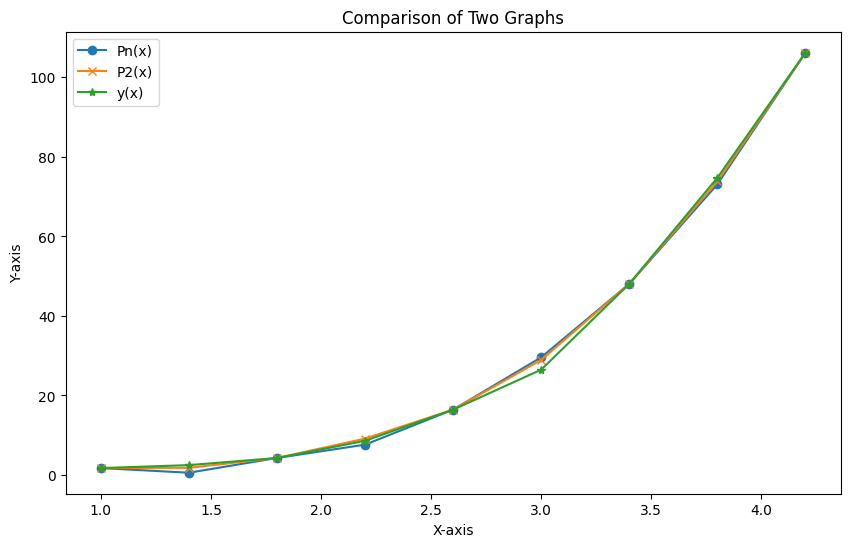

In [ ]:
import numpy as np

# Введення даних таблиці
data = [
    (1.00, 1.750),
    (1.80, 2.496),
    (2.60, 16.446),
    (3.40, 48.073),
    (4.20, 106.175),
]

# Значення x для розрахунку
x_values_to_evaluate = [1.00, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.2]

# Функція для інтерполяційного поліному Лагранжа
def lagrange_interpolation(x_points, y_points, x):
    """
    Обчислення інтерполяції за формулою Лагранжа.
    x_points, y_points - точки, що використовуються для інтерполяції.
    x - значення, для якого обчислюється інтерполююча функція.
    """
    n = len(x_points)
    result = 0
    
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

# Вибір відомих точок (x, y)
x_points = [point[0] for point in data if point[1] is not None]
y_points = [point[1] for point in data if point[1] is not None]

# Розрахунок значень P(x) для заданих x
results = {}
for x in x_values_to_evaluate:
    print(f"\n=== Розрахунок для x = {x} ===")
    results[x] = lagrange_interpolation(x_points, y_points, x)

# Виведення результатів
print("\n=== Результати обчислення ===")
for x, y in results.items():
    print(f"P({x}) = {y}")




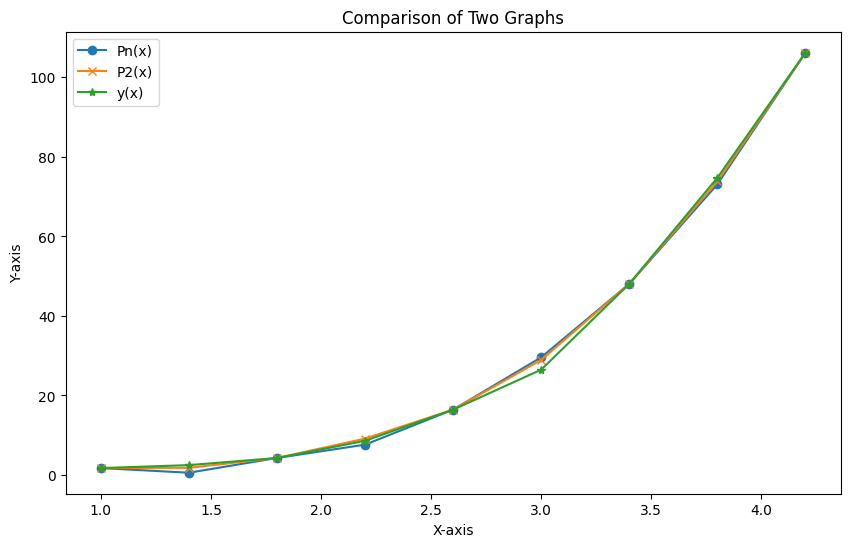

In [ ]:
import matplotlib.pyplot as plt

# Data points for the first graph
y1 = [1.750, 0.583, 4.290, 7.642, 16.446, 29.601, 48.073, 73.096, 106.175]

# Data points for the second graph
y2 = [1.750, 1.819, 4.292, 9.169, 16.448, 28.953, 48.076, 73.82, 106.181]

y = [1.750, 

2.496, 

4.290, 

8.609, 

16.446, 

26.493, 

48.073, 

74.743, 

106.175, ]


# Generate x values for both sets of data points
x = [1.00, 1.40, 1.80, 2.20, 2.60, 3.00, 3.40, 3.80, 4.20]

# Plotting the data points
plt.figure(figsize=(10, 6))

# Plot the first graph
plt.plot(x, y1, marker='o', label='Pn(x)')

# Plot the second graph
plt.plot(x, y2, marker='x', label='P2(x)')

plt.plot(x, y, marker='*', label='y(x)')

# Adding titles and labels
plt.title('Comparison of Two Graphs')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Adding a legend|
plt.legend()

# Display the plot
plt.show()


In [ ]:
import numpy as np

def finite_difference_table(xs, ys):
    """Build the finite difference table."""
    n = len(ys)
    table = np.zeros((n, n))
    table[:, 0] = ys  # First column is y-values

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = table[i + 1, j - 1] - table[i, j - 1]
    
    return table

def newton_forward_interpolation(xs, ys, x, order):
    """Newton Forward Interpolation Formula."""
    table = finite_difference_table(xs, ys)
    h = xs[1] - xs[0]
    p = (x - xs[0]) / h

    value = ys[0]
    for i in range(1, order + 1):
        term = table[0, i]
        for j in range(i):
            term *= (p - j)
        term /= np.math.factorial(i)
        value += term

    return value

def newton_backward_interpolation(xs, ys, x, order):
    """Newton Backward Interpolation Formula."""
    table = finite_difference_table(xs, ys)
    h = xs[1] - xs[0]
    n = len(xs)
    p = (x - xs[-1]) / h

    value = ys[-1]
    for i in range(1, order + 1):
        term = table[n - i - 1, i]
        for j in range(i):
            term *= (p + j)
        term /= np.math.factorial(i)
        value += term

    return value

# Given data
xs = [1, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.2]
ys = [1.75, 2.496, 4.290, 8.609, 16.446, 26.493, 48.073, 74.743, 106.175]

# Inside the range (x0, x1)
x_inside = 1.11
# Outside the range (x7, x8)
x_outside = 4.05

# 2nd and 3rd order Newton Forward Interpolation
forward_2nd = newton_forward_interpolation(xs, ys, x_inside, 2)
forward_3rd = newton_forward_interpolation(xs, ys, x_inside, 3)
backward_2nd = newton_backward_interpolation(xs, ys, x_inside, 2)
backward_3rd = newton_backward_interpolation(xs, ys, x_inside, 3)
# 2nd and 3rd order Newton Backward Interpolation
second_forward_2nd = newton_forward_interpolation(xs, ys, x_outside, 2)
second_forward_3rd = newton_forward_interpolation(xs, ys, x_outside, 3)
second_backward_2nd = newton_backward_interpolation(xs, ys, x_outside, 2)
second_backward_3rd = newton_backward_interpolation(xs, ys, x_outside, 3)

print(f"Інтерполяція вперед для 2 ступеня x={x_inside}: {forward_2nd}")
print(f"Інтерполяція вперед для 3 ступеня x={x_inside}: {forward_3rd}")
print(f"Інтерполяція назад для 2 ступеня x={x_inside}: {backward_2nd}")
print(f"Інтерполяція назад для 3 ступеня x={x_inside}: {backward_3rd}")

print(f"Інтерполяція вперед для 2 ступеня x={x_outside}: {second_forward_2nd}")
print(f"Інтерполяція вперед для 3 ступеня x={x_outside}: {second_forward_3rd}")
print(f"Інтерполяція назад для 2 ступеня x={x_outside}: {second_backward_2nd}")
print(f"Інтерполяція назад для 3 ступеня x={x_outside}: {second_backward_3rd}")

Інтерполяція вперед для 2 ступеня x=1.11: 1.8506775000000002
Інтерполяція вперед для 3 ступеня x=1.11: 1.9353396015625002
Інтерполяція назад для 2 ступеня x=1.11: -12.942761874999817
Інтерполяція назад для 3 ступеня x=1.11: 3.316052062499459
Інтерполяція вперед для 2 ступеня x=4.05: 33.90843750000001
Інтерполяція вперед для 3 ступеня x=4.05: 103.85679199218754
Інтерполяція назад для 2 ступеня x=4.05: 93.82995312499996
Інтерполяція назад для 3 ступеня x=4.05: 93.85077343749995


/tmp/ipykernel_12719/1800674722.py:26: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term /= np.math.factorial(i)
/tmp/ipykernel_12719/1800674722.py:43: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term /= np.math.factorial(i)


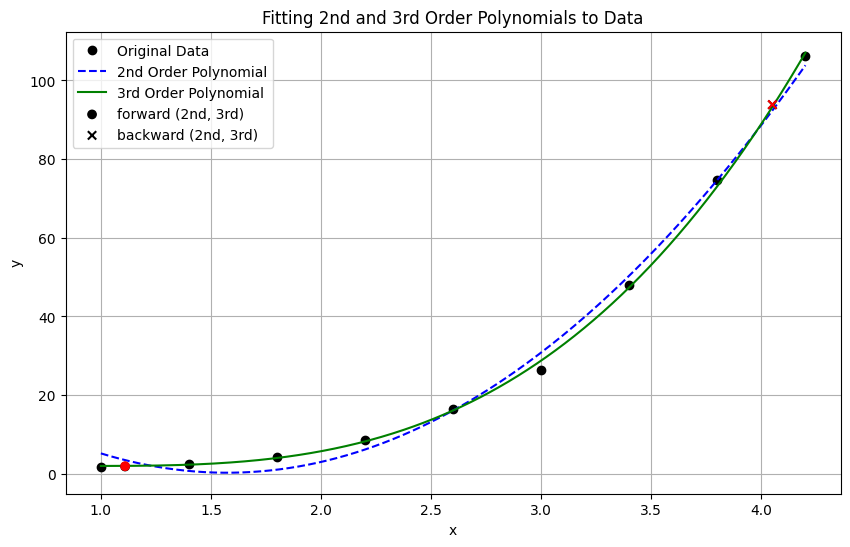

2nd Order Polynomial:
    2
15 x - 47.19 x + 37.38

3rd Order Polynomial:
       3         2
2.974 x - 8.191 x + 7.504 x - 0.2862


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
xs = np.array([1, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.2])
ys = np.array([1.75, 2.496, 4.290, 8.609, 16.446, 26.493, 48.073, 74.743, 106.175])

# Fit polynomials
coeffs_2nd = np.polyfit(xs, ys, 2)  # Second-order polynomial
coeffs_3rd = np.polyfit(xs, ys, 3)  # Third-order polynomial

# Generate polynomial functions
poly_2nd = np.poly1d(coeffs_2nd)
poly_3rd = np.poly1d(coeffs_3rd)

# Generate smooth x values for plotting
x_plot = np.linspace(xs.min(), xs.max(), 300)
y_2nd = poly_2nd(x_plot)
y_3rd = poly_3rd(x_plot)

# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.plot(xs, ys, 'o', label="Original Data", color="black")

# Fitted polynomials
plt.plot(x_plot, y_2nd, '--', label="2nd Order Polynomial", color="blue")
plt.plot(x_plot, y_3rd, '-', label="3rd Order Polynomial", color="green")
plt.scatter([x_inside, x_inside], [forward_2nd, forward_3rd], 
            c=["black", "red"], label="forward (2nd, 3rd)", zorder=5)
plt.scatter([x_outside, x_outside], [second_backward_2nd, second_backward_3rd], 
            c=["black", "red"], label="backward (2nd, 3rd)", marker='x', zorder=5)
# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting 2nd and 3rd Order Polynomials to Data")
plt.legend()
plt.grid()
plt.show()

# Print polynomial equations
print("2nd Order Polynomial:")
print(poly_2nd)

print("\n3rd Order Polynomial:")
print(poly_3rd)


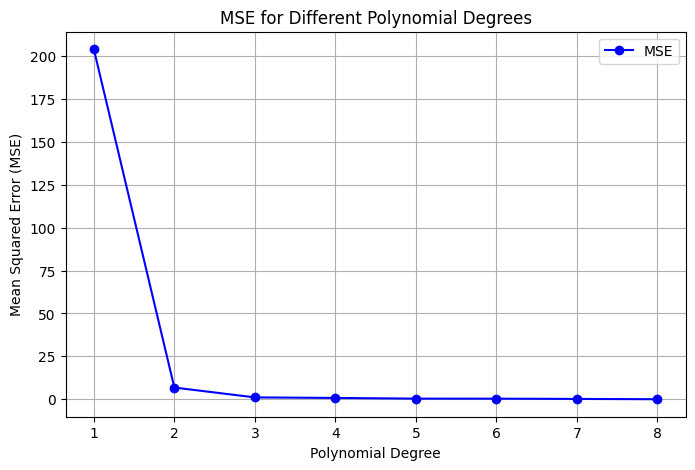

Best Polynomial of Degree 8:
       8         7         6        5            4             3
5.362 x - 109.5 x + 952.6 x - 4604 x + 1.35e+04 x - 2.454e+04 x
              2
 + 2.698e+04 x - 1.636e+04 x + 4187


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
xs = np.array([1, 1.4, 1.8, 2.2, 2.6, 3.0, 3.4, 3.8, 4.2])
ys = np.array([1.75, 2.496, 4.290, 8.609, 16.446, 26.493, 48.073, 74.743, 106.175])

# Maximum polynomial degree to test
max_degree = 8

# Store MSE values
mse_values = []

# Fit polynomials of increasing degree and calculate MSE
for degree in range(1, max_degree + 1):
    coeffs = np.polyfit(xs, ys, degree)
    poly = np.poly1d(coeffs)
    y_pred = poly(xs)  # Predicted values
    mse = np.mean((ys - y_pred) ** 2)  # Mean Squared Error
    mse_values.append(mse)


# Plot MSE vs Degree
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_degree + 1), mse_values, 'o-', label="MSE", color="blue")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Different Polynomial Degrees")
plt.legend()
plt.grid()
plt.show()

# Fit and print the best polynomial
best_coeffs = np.polyfit(xs, ys, best_degree)
best_poly = np.poly1d(best_coeffs)
print(f"Best Polynomial of Degree {best_degree}:")
print(best_poly)


In [20]:
import numpy as np

# Define the function
def f(x):
    return np.log(2 * x) + x - 5

# Given x-values
x_values = [1.50, 1.70, 1.90, 2.10, 2.30, 2.50, 2.70, 2.90, 3.10]

# Calculate y-values
y_values = [f(x) for x in x_values]

# Print results
print("y-values:", y_values)

# Optionally display in a formatted table
print("\nFormatted Output:")
print(f"{'y':>15}")
for x, y in zip(x_values, y_values):
    print(f"{y:>15.3f}")


y-values: [-2.4013877113318904, -2.076224568377884, -1.7649989332676599, -1.4649154747106774, -1.173943696504951, -0.8905620875658995, -0.6136010464297712, -0.34214208244762645, -0.07545070794895459]

Formatted Output:
              y
         -2.401
         -2.076
         -1.765
         -1.465
         -1.174
         -0.891
         -0.614
         -0.342
         -0.075


/tmp/ipykernel_12719/1891935623.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (max_derivative / np.math.factorial(order + 1)) * product


Апріорна похибка інтерполяції: 0.0000000000


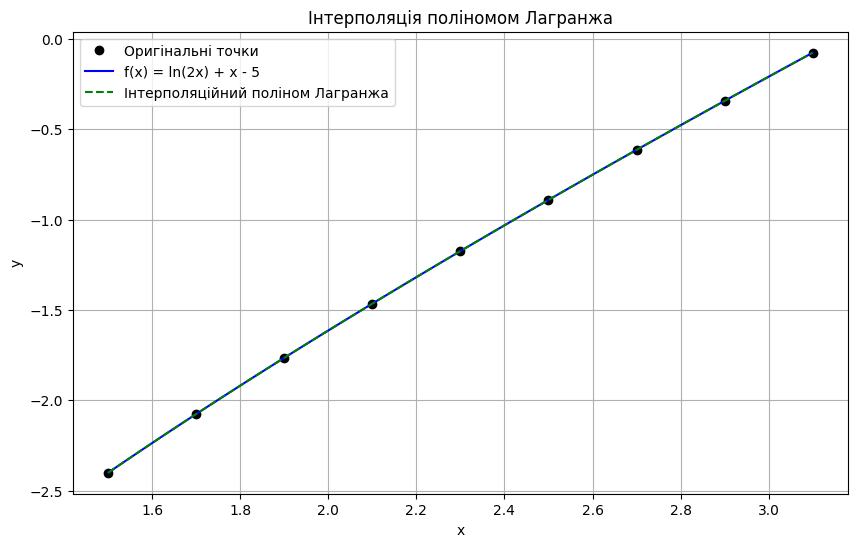

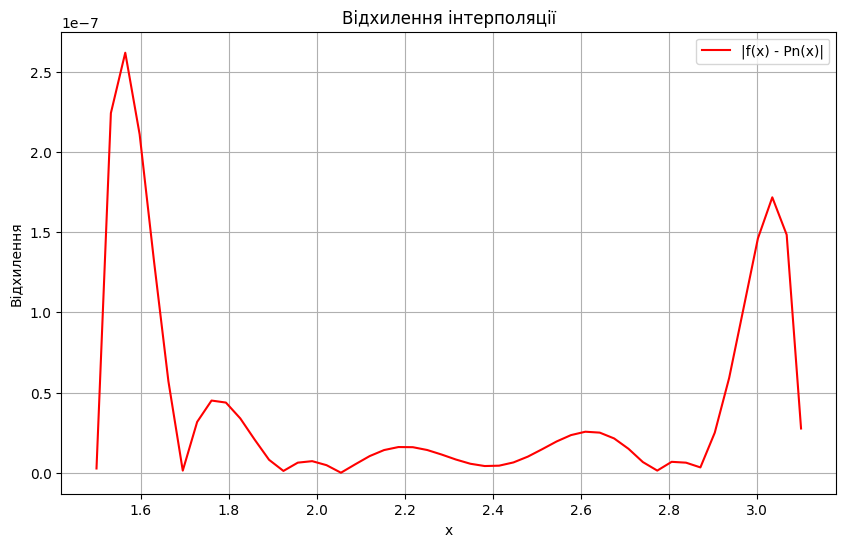

Максимальна апостеріорна похибка: 0.000000
Апріорна похибка: 0.000000
Апостеріорна похибка перевищує апріорну, можливі додаткові похибки.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import math
# 1. Початкові дані
x_values = np.array([1.50, 1.70, 1.90, 2.10, 2.30, 2.50, 2.70, 2.90, 3.10])
y_values = np.log(2 * x_values) + x_values - 5

# 9. Визначення апріорної похибки інтерполяції
def theoretical_error(xi, x_values, order):
    """
    Розрахунок апріорної похибки за залишковим членом інтерполяції.
    """
    x_min, x_max = x_values.min(), x_values.max()
    # Оцінка max похідної (f^(n+1)(x)) для x в [x_min, x_max]
    def f_derivative(x):
        return 40320 /  x**order  # Похідна n+1 степеня ln(2x)

    max_derivative = max(f_derivative(x_min), f_derivative(x_max))
    product = np.prod([abs(xi - xk) for xk in x_values])
    return (max_derivative / np.math.factorial(order + 1)) * product

# Визначення апріорної похибки для всіх x
order = len(x_values) - 1
xi = np.mean(x_values)
apriori_error = theoretical_error(xi, x_values, order)
print(f"Апріорна похибка інтерполяції: {apriori_error:.10f}")

# 10. Інтерполяція за допомогою полінома Лагранжа
lagrange_poly = lagrange(x_values, y_values)
lagrange_poly_func = Polynomial(lagrange_poly.coef[::-1])  # Poly -> Callable

# 11. Додавання нових точок
new_x = np.linspace(x_values.min(), x_values.max(), 50)  # Нові точки
new_y = np.log(2 * new_x) + new_x - 5  # Точні значення функції
interp_y = lagrange_poly_func(new_x)   # Значення полінома
deviation = np.abs(new_y - interp_y)   # Відхилення

# 12. Побудова графіків
plt.figure(figsize=(10, 6))

# Графік функції та полінома
plt.plot(x_values, y_values, 'o', label="Оригінальні точки", color="black")
plt.plot(new_x, new_y, label="f(x) = ln(2x) + x - 5", color="blue")
plt.plot(new_x, interp_y, '--', label="Інтерполяційний поліном Лагранжа", color="green")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Інтерполяція поліномом Лагранжа")
plt.legend()
plt.grid()
plt.show()

# Графік відхилення
plt.figure(figsize=(10, 6))
plt.plot(new_x, deviation, label="|f(x) - Pn(x)|", color="red")
plt.xlabel("x")
plt.ylabel("Відхилення")
plt.title("Відхилення інтерполяції")
plt.grid()
plt.legend()
plt.show()

# 13. Апостеріорна похибка
max_deviation = deviation.max()
print(f"Максимальна апостеріорна похибка: {max_deviation:.6f}")
print(f"Апріорна похибка: {apriori_error:.6f}")
if apriori_error > max_deviation:
    print("Апріорна похибка перевищує апостеріорну, що свідчить про точність інтерполяції.")
else:
    print("Апостеріорна похибка перевищує апріорну, можливі додаткові похибки.")



/tmp/ipykernel_11793/1725891649.py:12: RuntimeWarning: invalid value encountered in sqrt
  y1_pos = np.sqrt(2*p*x + p**2)
/tmp/ipykernel_11793/1725891649.py:13: RuntimeWarning: invalid value encountered in sqrt
  y1_neg = -np.sqrt(2*p*x + p**2)
/tmp/ipykernel_11793/1725891649.py:16: RuntimeWarning: invalid value encountered in sqrt
  y2_pos = np.sqrt(-2*q*x + q**2)
/tmp/ipykernel_11793/1725891649.py:17: RuntimeWarning: invalid value encountered in sqrt
  y2_neg = -np.sqrt(-2*q*x + q**2)


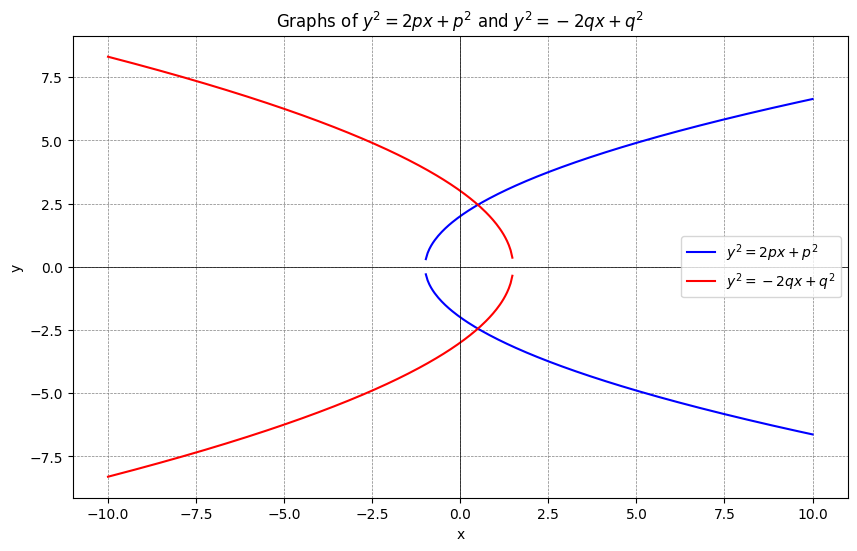

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 2  # Example value for p
q = 3  # Example value for q

# Define the range for x
x = np.linspace(-10, 10, 400)

# Calculate y for the first equation y^2 = 2px + p^2
y1_pos = np.sqrt(2*p*x + p**2)
y1_neg = -np.sqrt(2*p*x + p**2)

# Calculate y for the second equation y^2 = -2qx + q^2
y2_pos = np.sqrt(-2*q*x + q**2)
y2_neg = -np.sqrt(-2*q*x + q**2)

# Plot the graphs
plt.figure(figsize=(10, 6))

plt.plot(x, y1_pos, label=r'$y^2 = 2px + p^2$', color='blue')
plt.plot(x, y1_neg, color='blue')
plt.plot(x, y2_pos, label=r'$y^2 = -2qx + q^2$', color='red')
plt.plot(x, y2_neg, color='red')

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.title('Graphs of $y^2 = 2px + p^2$ and $y^2 = -2qx + q^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
